In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from pycaret import nlp
from pycaret import classification
mpl.rcParams['figure.dpi'] = 300

In [7]:
data = pd.read_csv('emo.csv')
data.head(10)

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy
5,#GBBO can cheer me up ☺️,joy
6,"&amp; as much as I hate for a dude to cheat, w...",joy
7,@GOT7Official @jrjyp happy birthday jin young!...,joy
8,@GOT7Official @jrjyp happy birthday jin young!...,joy
9,The race advances only by the extra achievemen...,joy


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3142 non-null   object
 1   label   3142 non-null   object
dtypes: object(2)
memory usage: 49.2+ KB


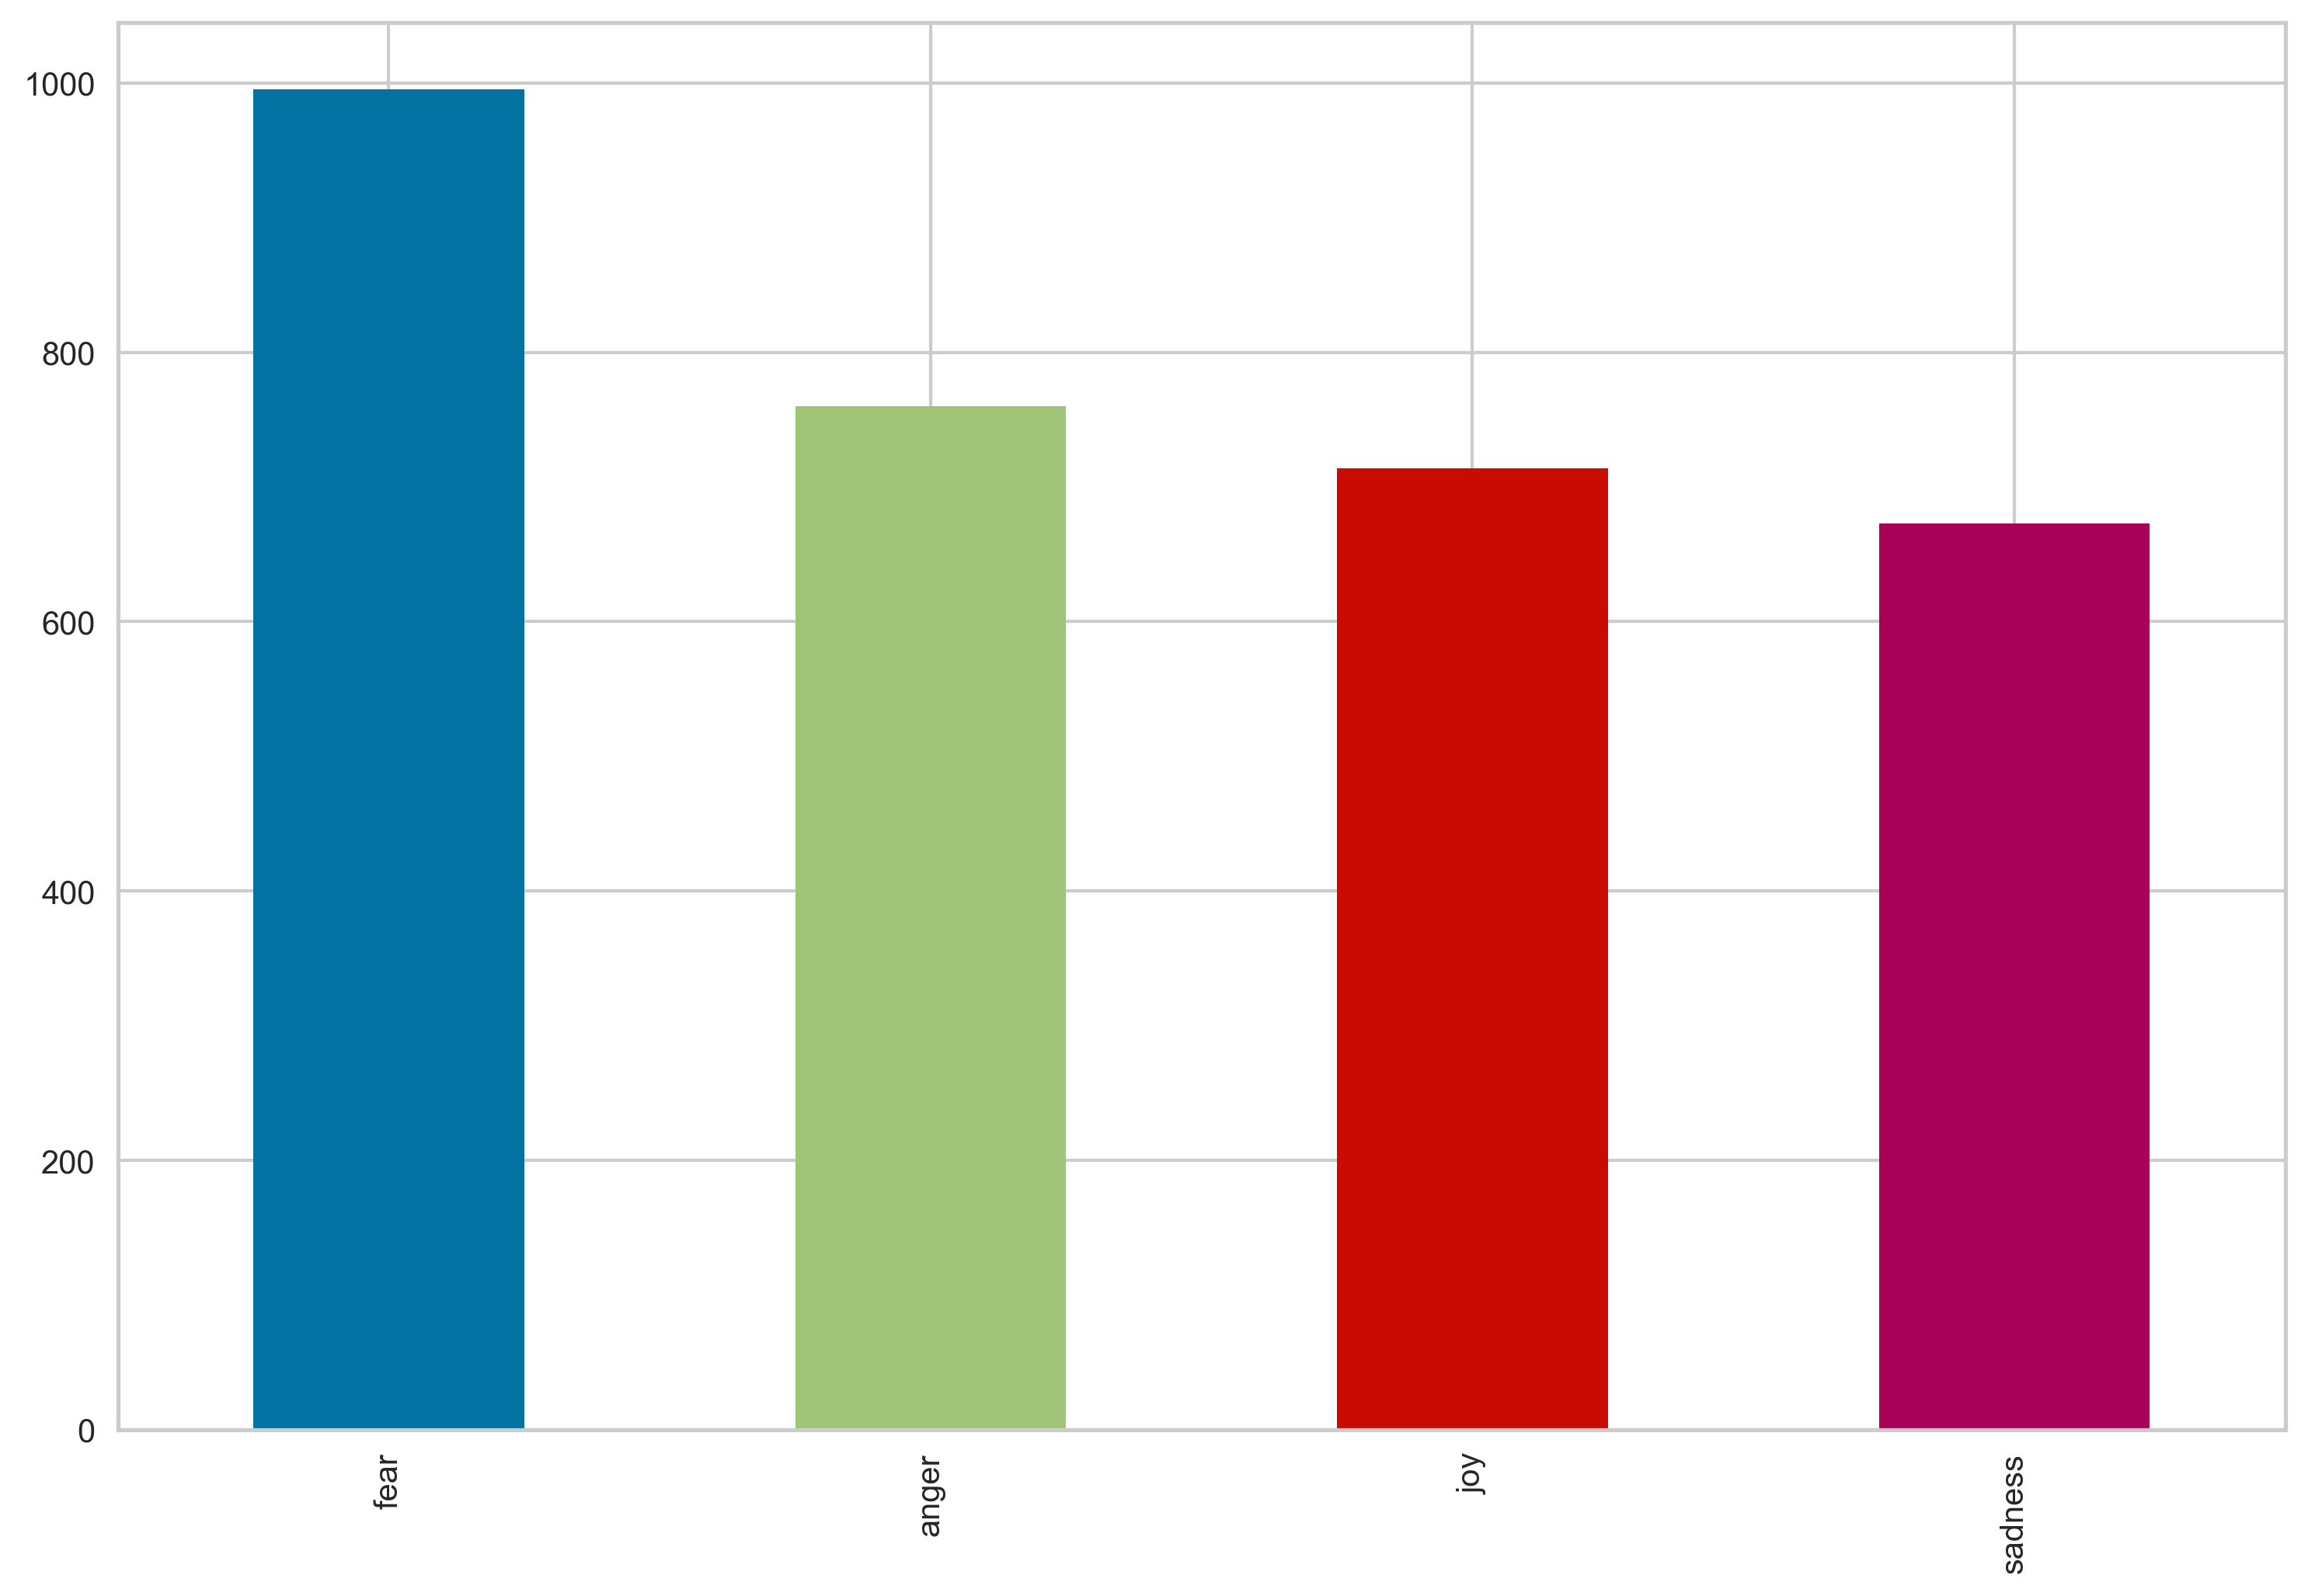

In [9]:
color = ['C0', 'C1', 'C2', 'C3']
categories = data['label'].value_counts()
categories.plot(kind = 'bar', figsize = (12,8), color = color)
plt.show()

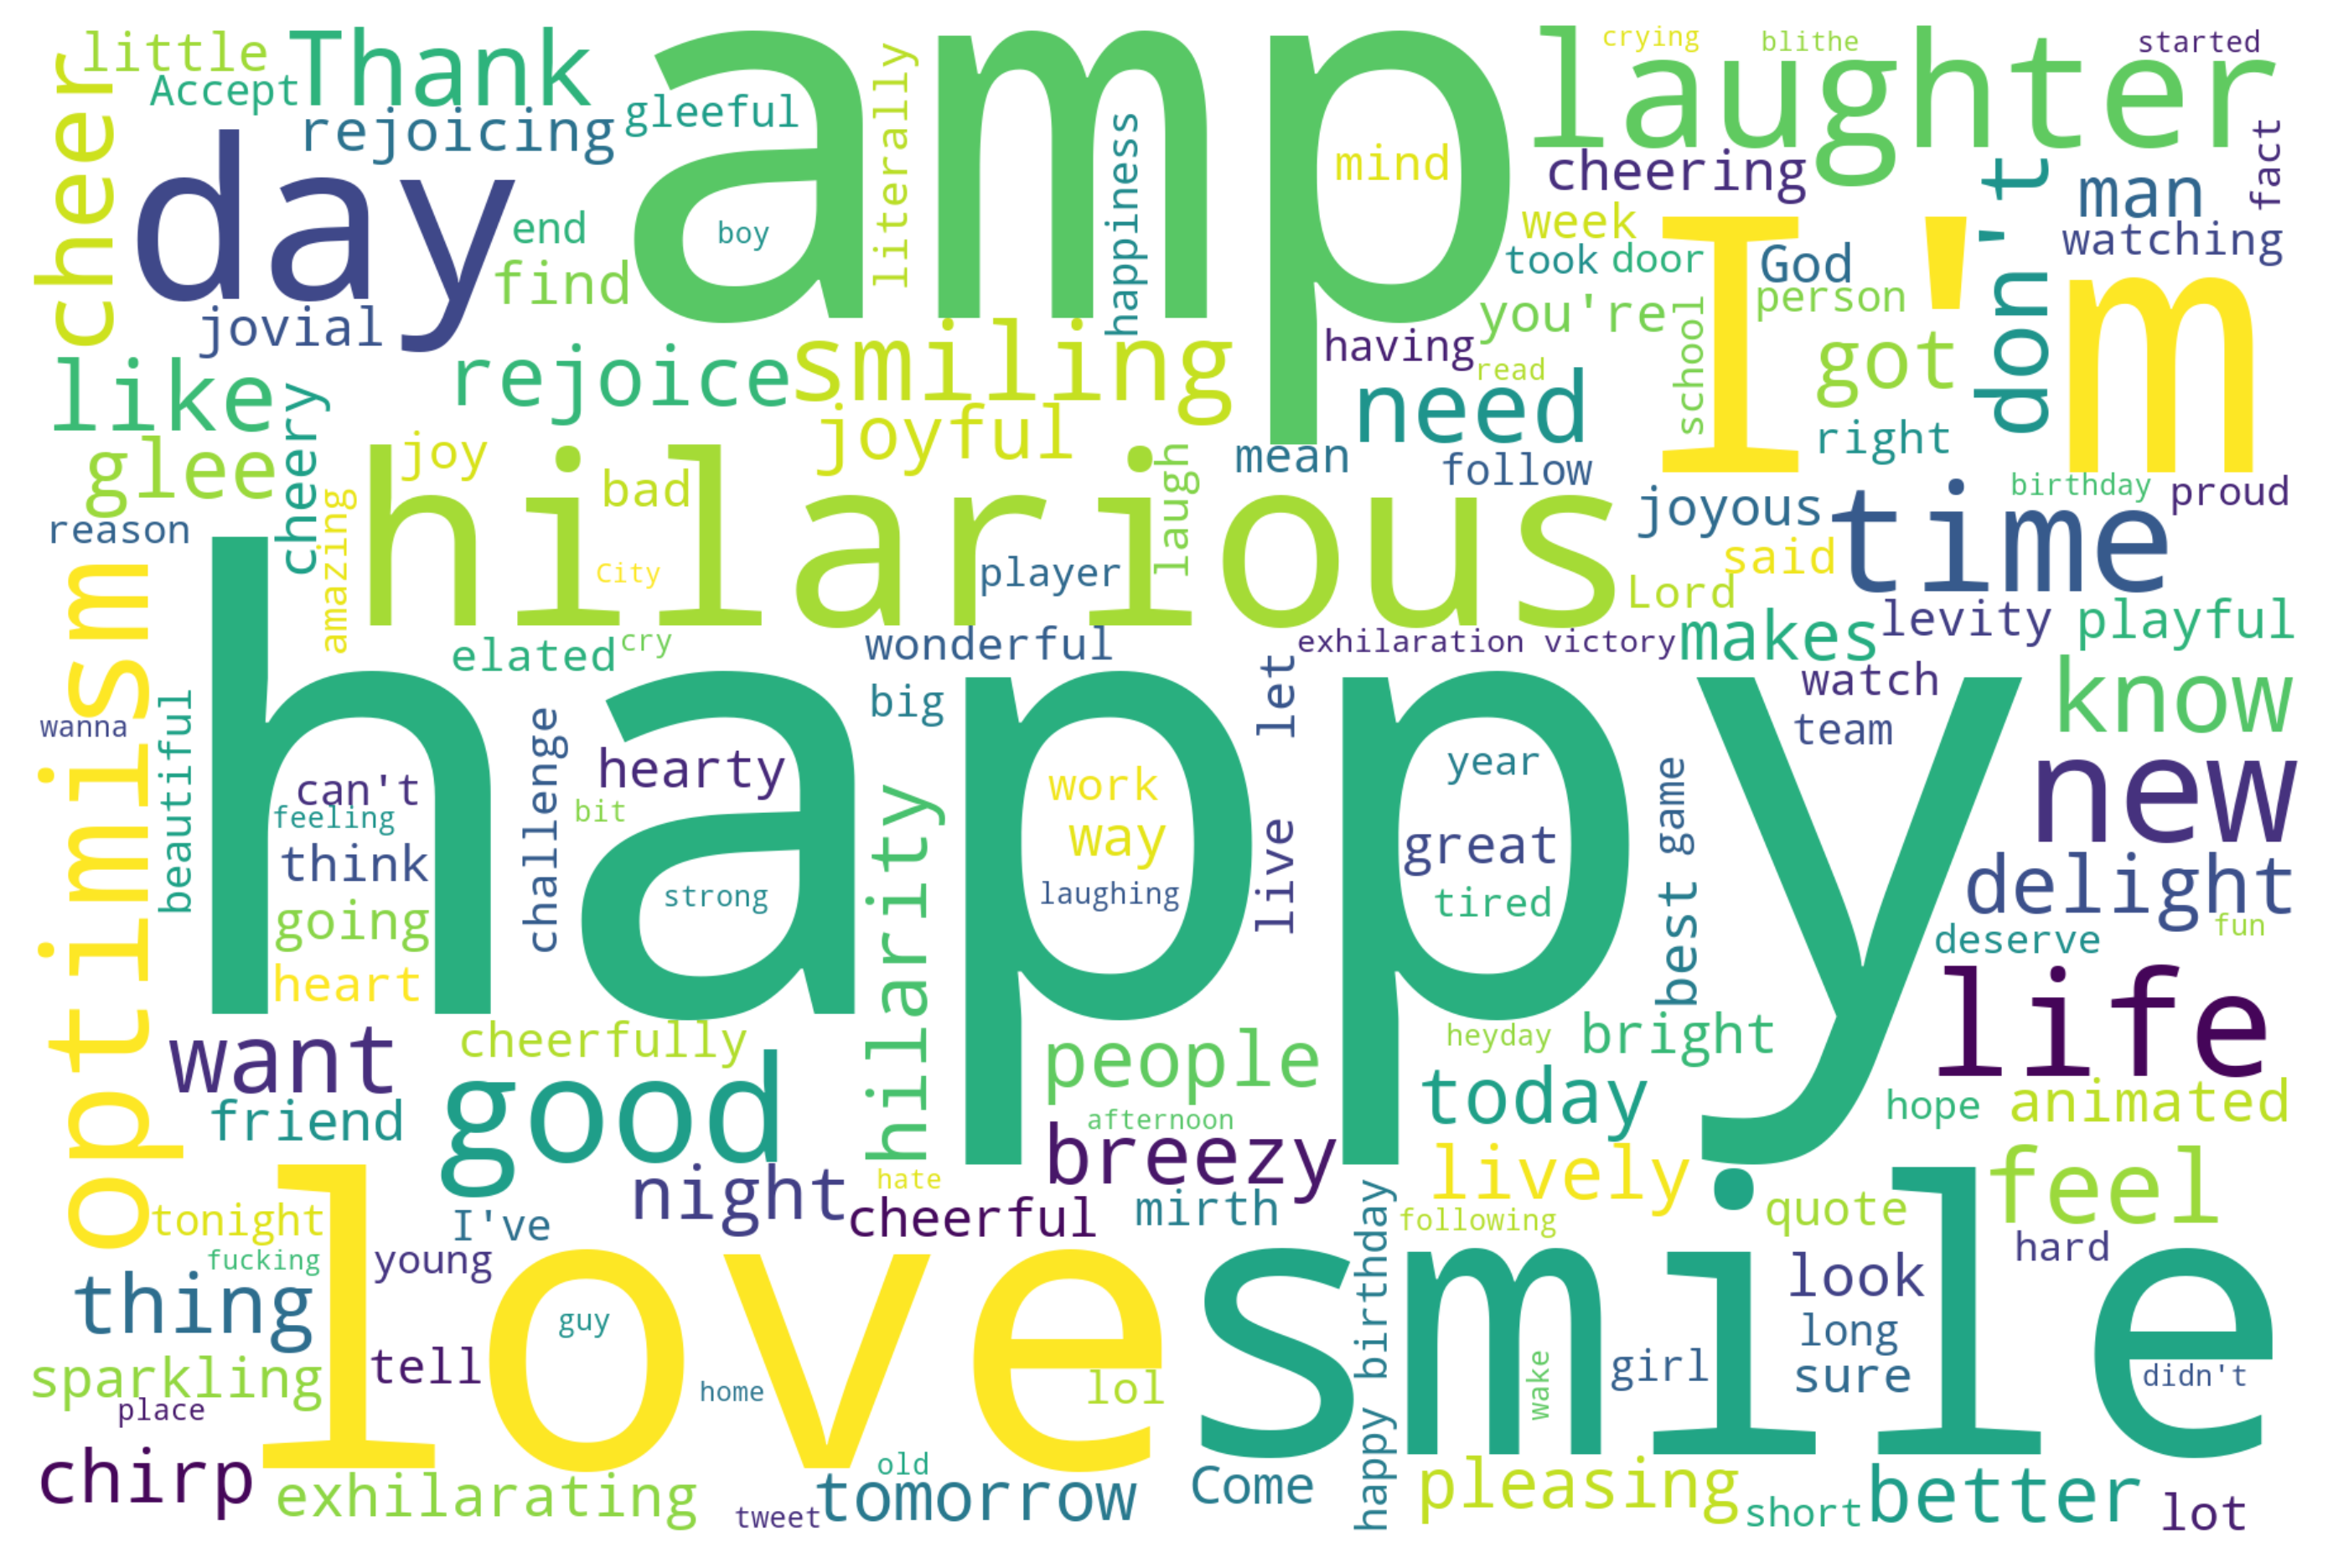

In [10]:
wc_joy = WordCloud(width = 1800, height = 1200, stopwords = STOP_WORDS,
     background_color = 'white', min_word_length = 3, max_words = 150)

data_joy = data.query(" label == 'joy' ")['text']
text_joy = ' '.join(data_joy.to_list())
wc_joy_img = wc_joy.generate(text_joy)

plt.figure(figsize = (12,8))
plt.imshow(wc_joy_img, interpolation = 'bilinear')
plt.axis("off")
plt.show()

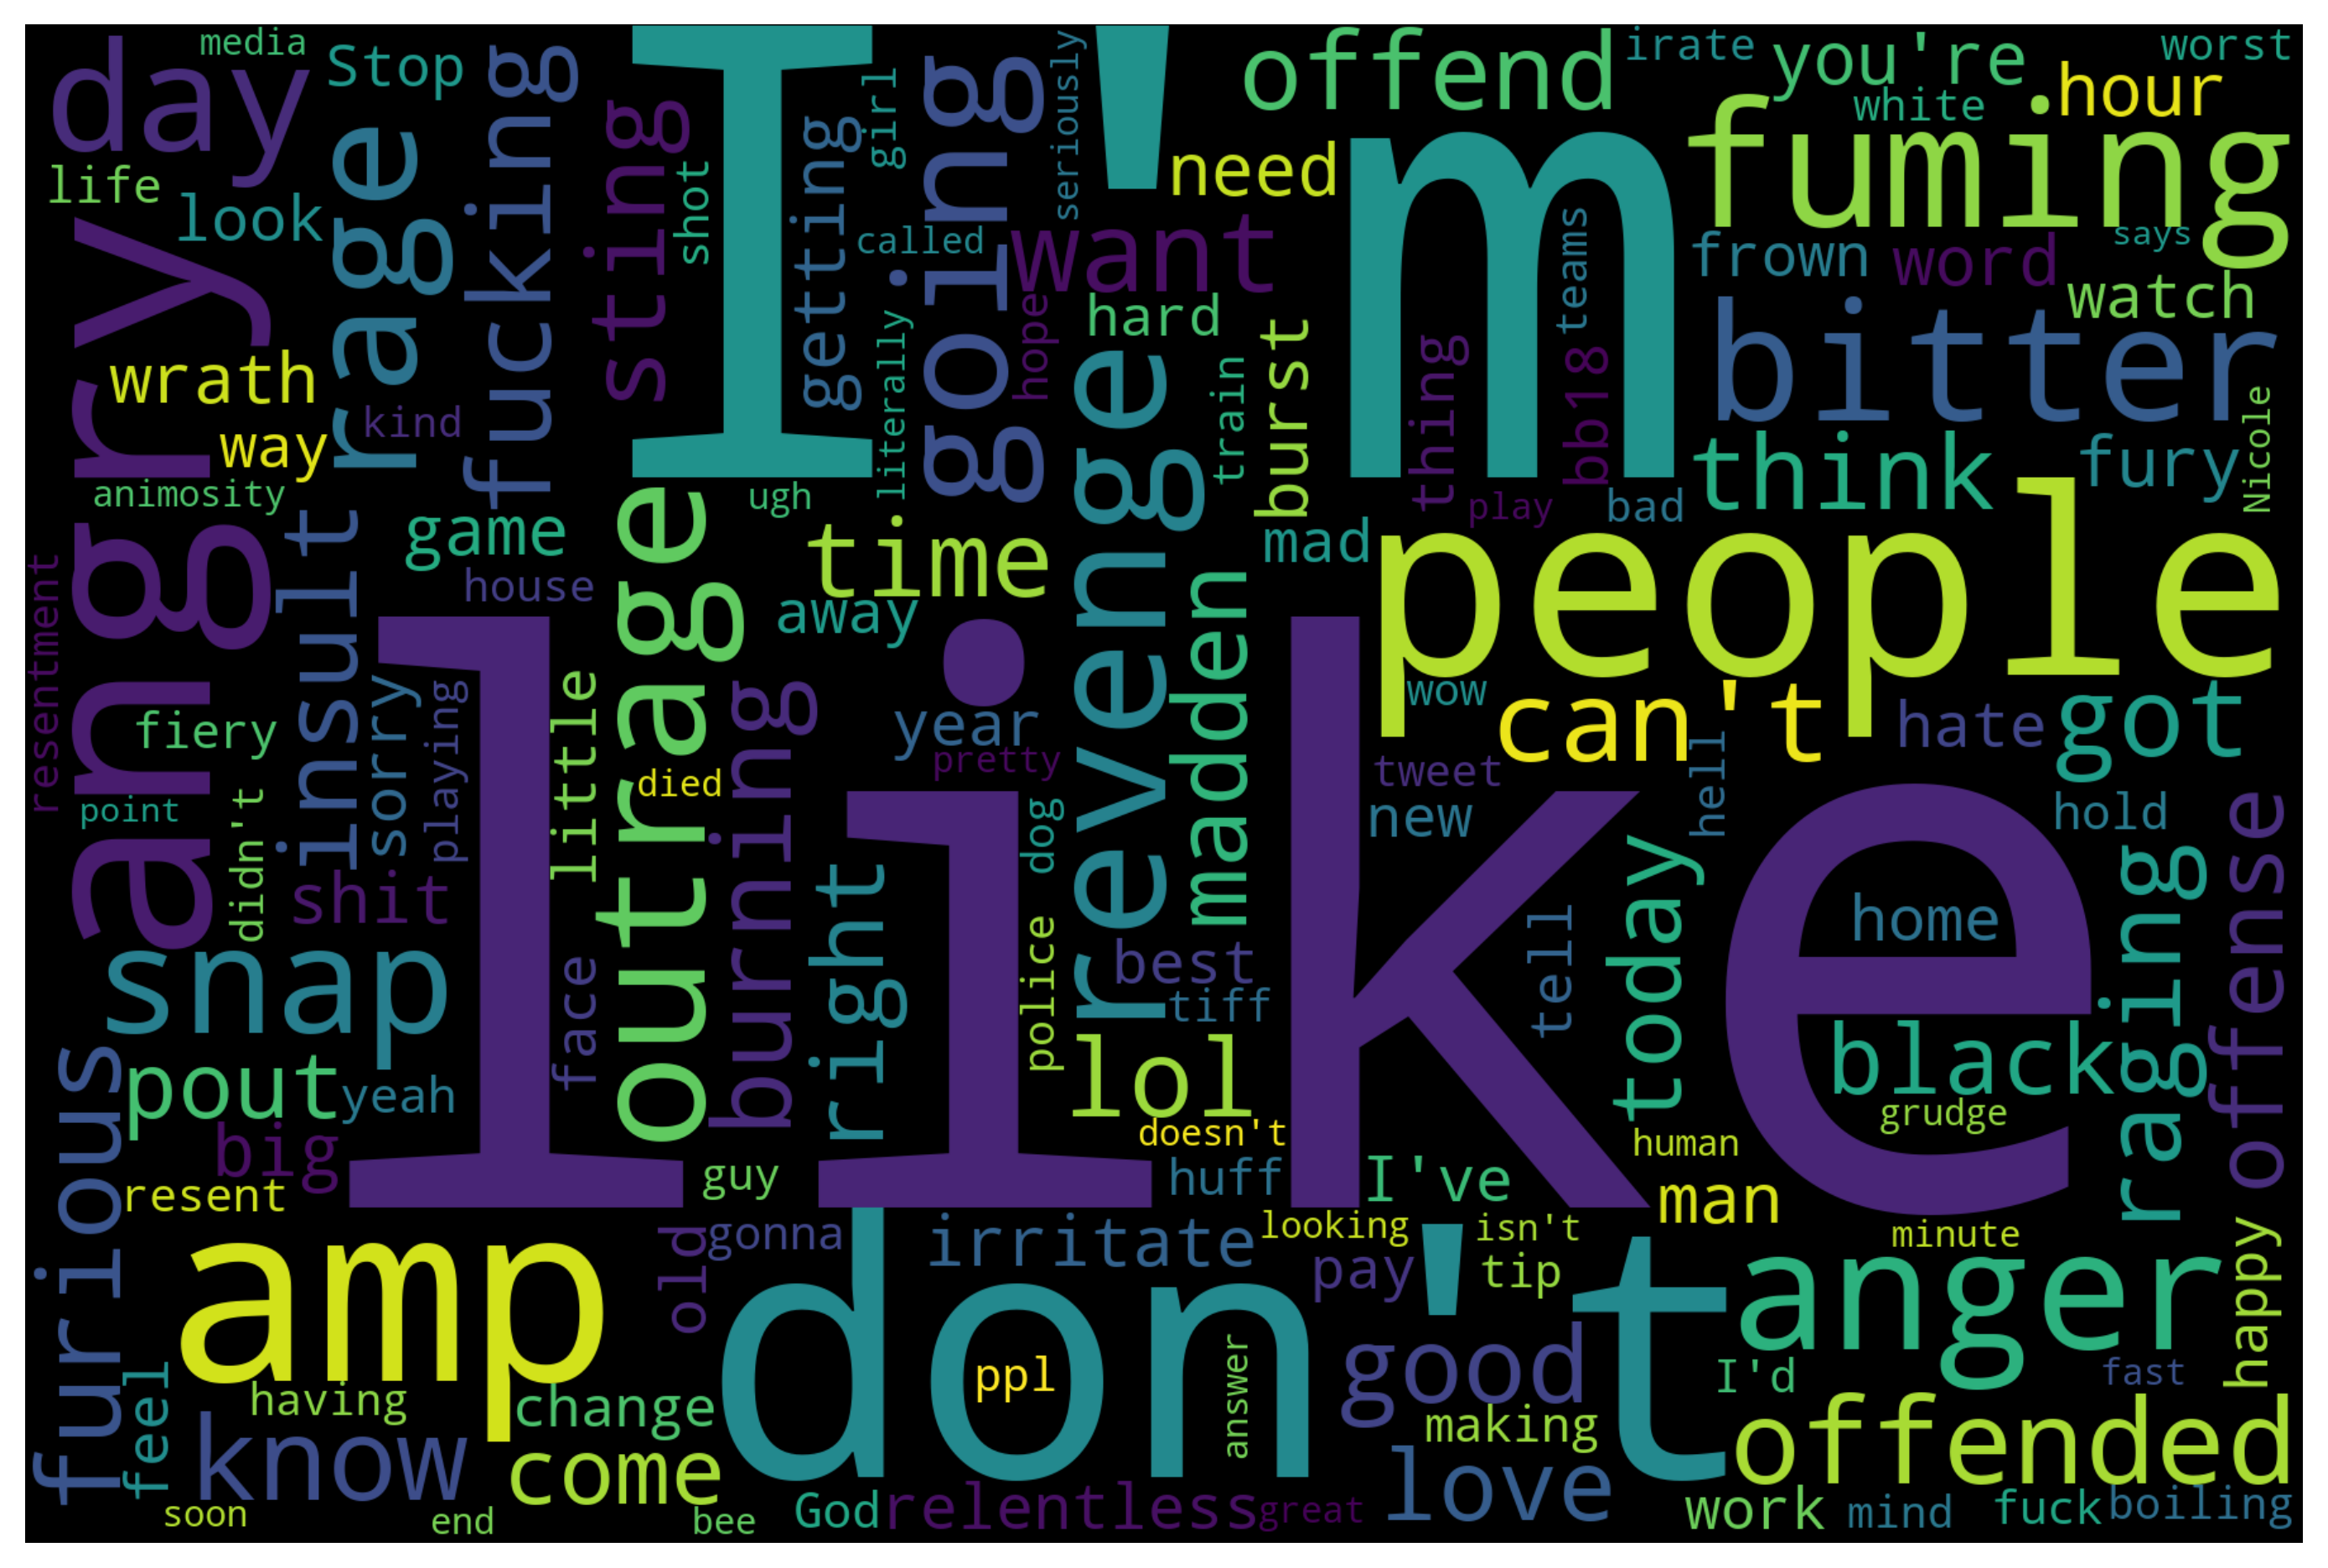

In [14]:
wc_anger = WordCloud(width = 1800, height = 1200, stopwords = STOP_WORDS,
     background_color = 'black', min_word_length = 3, max_words = 140)

data_anger = data.query(" label == 'anger' ")['text']
text_anger = ' '.join(data_anger.to_list())
wc_anger_img = wc_anger.generate(text_anger)

plt.figure(figsize = (12,8))
plt.imshow(wc_anger_img, interpolation = 'bilinear')
plt.axis("off")
plt.show()

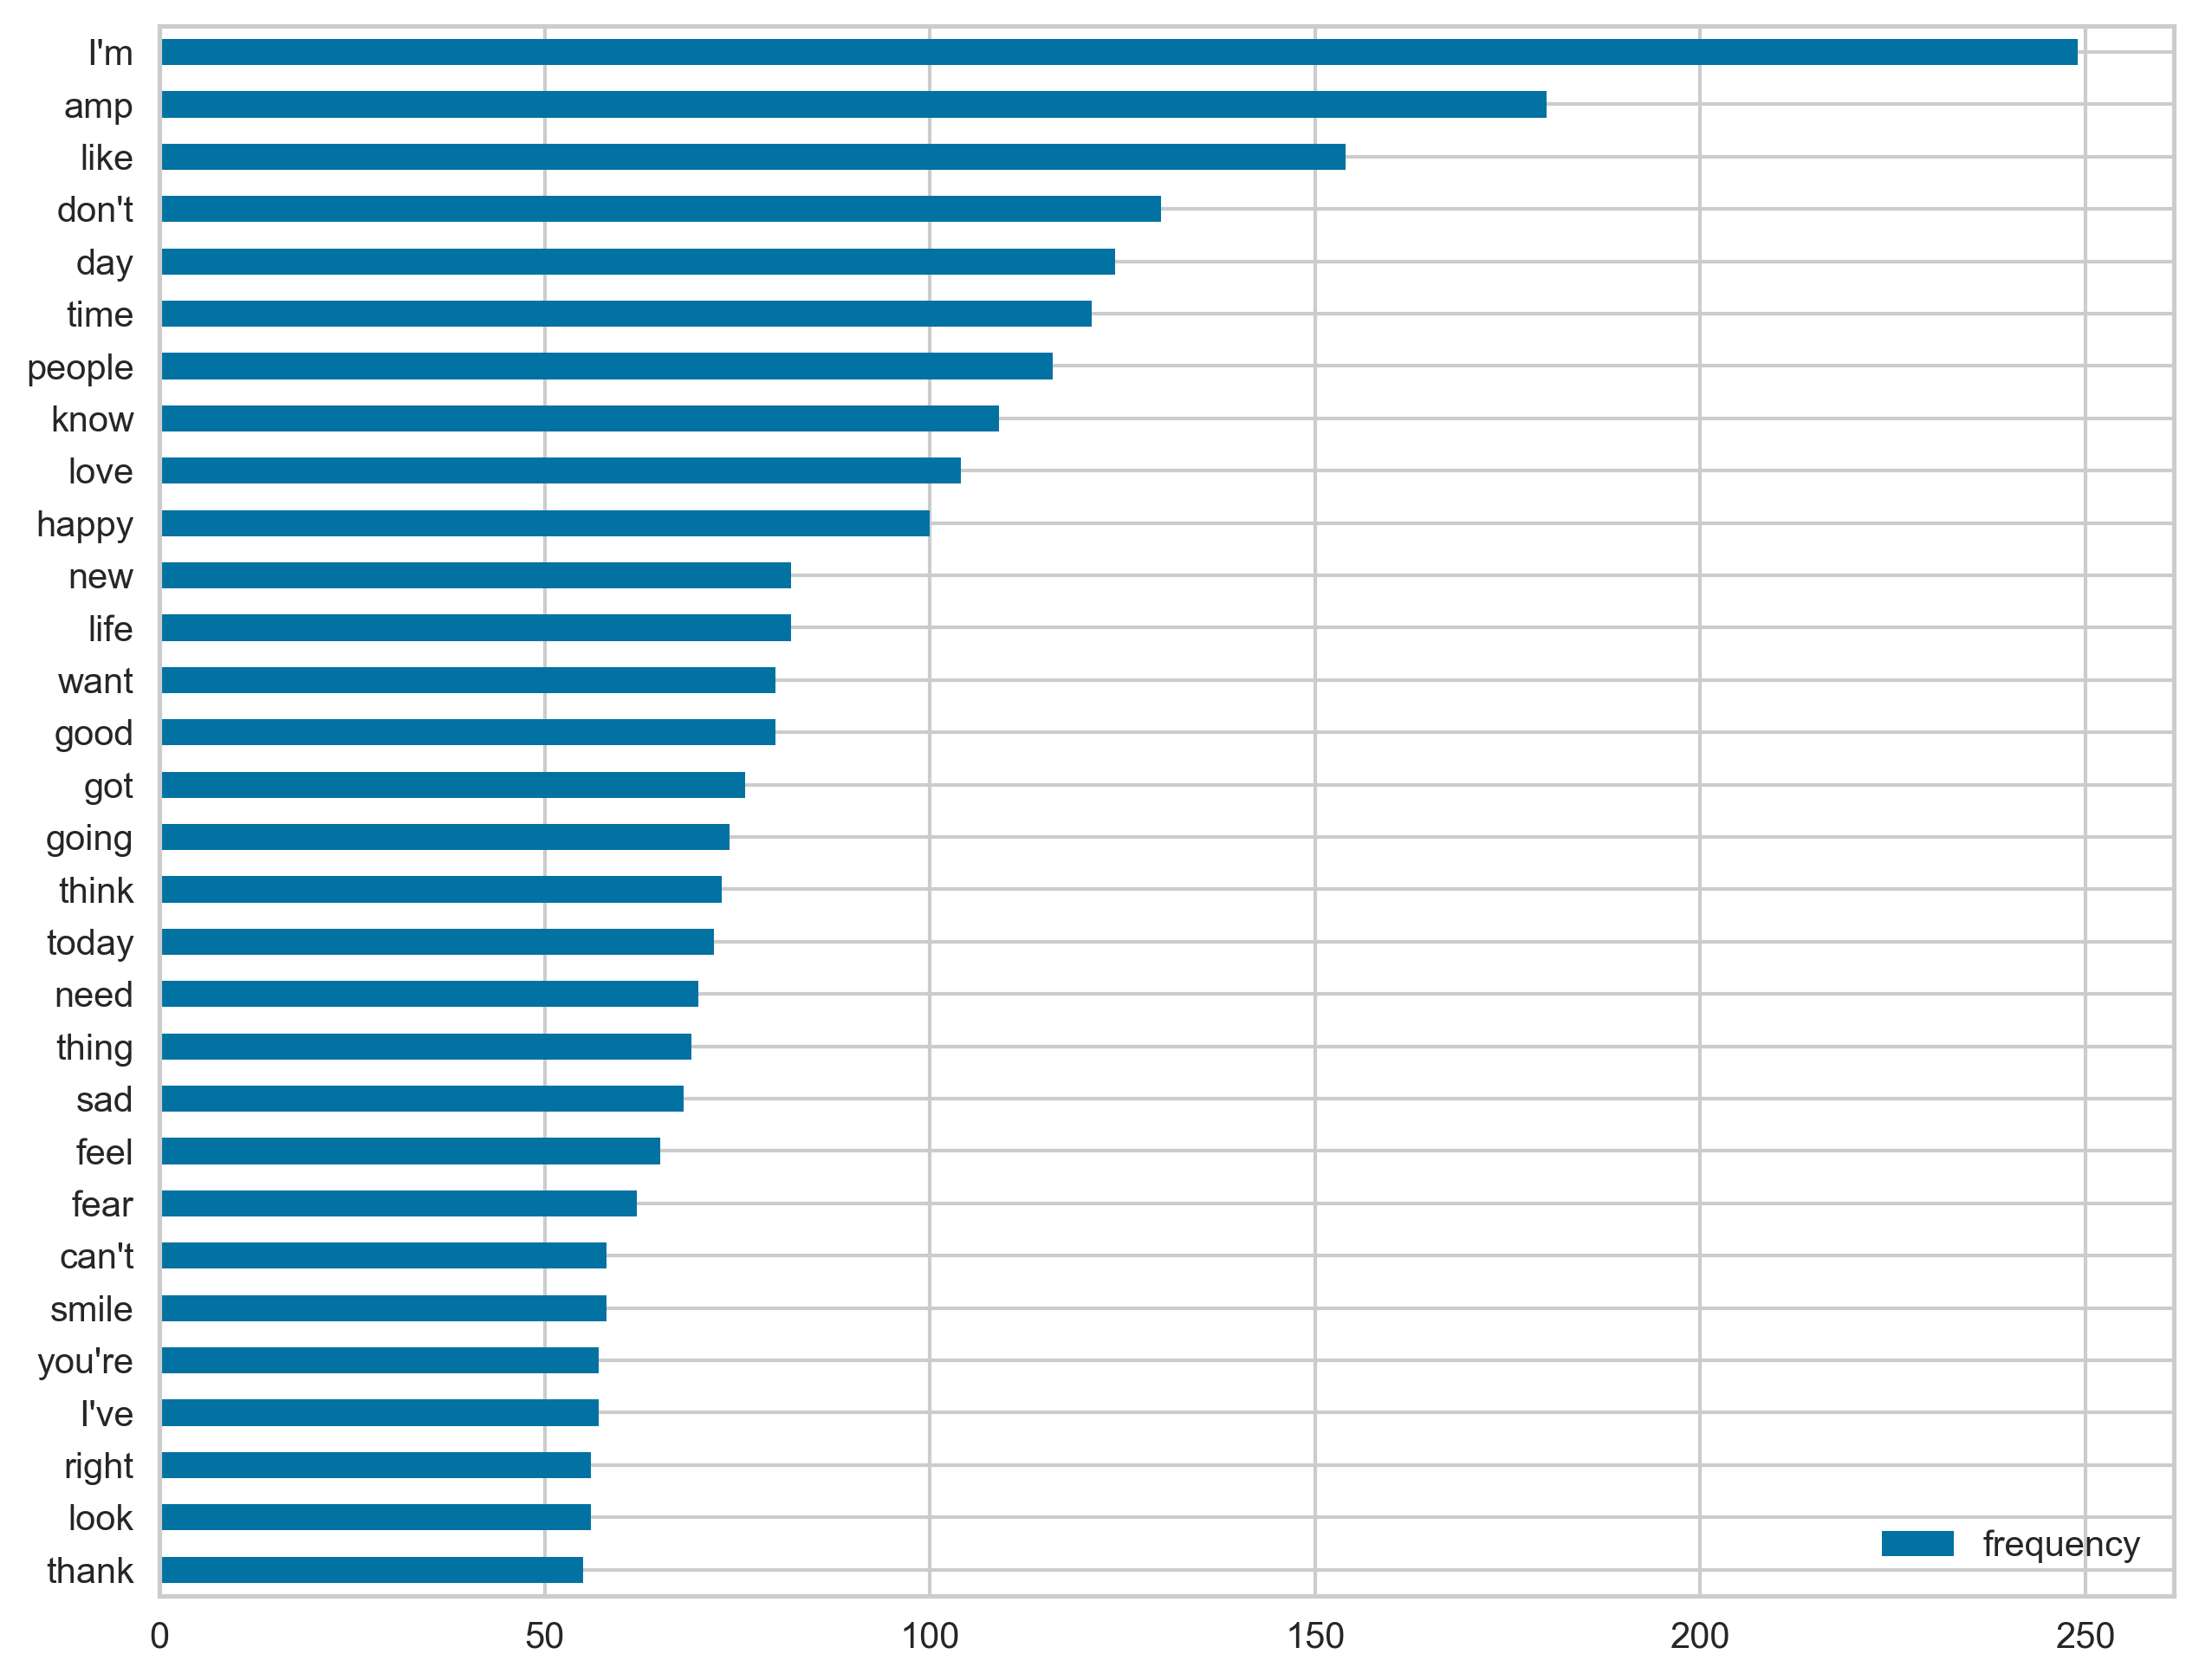

In [16]:
text = ' '.join(data['text'].to_list())
freq = wc.process_text(text)
df_freq = pd.DataFrame.from_dict(freq, orient='index', columns=['frequency'])
df_freq = df_freq.sort_values('frequency')
df_freq[-30:].plot(kind = 'barh', figsize = (10,8))
plt.show()

In [17]:
get_ipython().system('python -m spacy download en_core_web_sm')

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [18]:
nlp_ = nlp.setup(data = data, target='text', session_id = 6842)
data_ = nlp.get_config('data_')
data_.head(10)

Description,Value
session_id,6842
Documents,3142
Vocab Size,4573
Custom Stopwords,False


,text,label
0,must know,joy
1,old say smile share gain day yeglifer,joy
2,bloody hilarious,joy
3,sparkle water make life sparkly,joy
4,tired tell chill everything fuck tired faking ...,joy
5,gbbo cheer,joy
6,much hate cheat woman pleasing man lazy amp ma...,joy
7,get birthday,joy
8,get happy_birthday,joy
9,race advance extra achievement individual indi...,joy


In [19]:
cols = ['Topic_0','Topic_1','Topic_2', 'Topic_3','label']
lda = nlp.create_model('lda', num_topics = 5)
data_assigned = nlp.assign_model(lda)
data_assigned_ = data_assigned[cols]
data_assigned_.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,label
0,0.287374,0.131227,0.212927,0.125997,joy
1,0.152238,0.098133,0.406714,0.223282,joy
2,0.286852,0.213124,0.213179,0.126210,joy
3,0.173780,0.258257,0.322942,0.108486,joy
4,0.254752,0.090585,0.145112,0.399468,joy
5,0.205150,0.131287,0.295293,0.126064,joy
6,0.328878,0.080288,0.128104,0.314458,joy
7,0.287411,0.131246,0.294878,0.126013,joy
8,0.289658,0.205667,0.216112,0.126983,joy
9,0.153483,0.098922,0.346528,0.280751,joy


In [20]:
nlp.plot_model(model = lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.286080 -0.034882       1        1  25.655240
0      0.096290  0.256840       2        1  24.534569
4     -0.230898 -0.153787       3        1  18.798432
1     -0.197542  0.154818       4        1  15.560208
3      0.046069 -0.222989       5        1  15.451552, topic_info=            Term        Freq       Total Category  logprob  loglift
34           get  185.000000  185.000000  Default  30.0000  30.0000
310           go  173.000000  173.000000  Default  29.0000  29.0000
3880        blue  111.000000  111.000000  Default  28.0000  28.0000
326          see  146.000000  146.000000  Default  27.0000  27.0000
111          sad  105.000000  105.000000  Default  26.0000  26.0000
24           amp  137.000000  137.000000  Default  25.0000  25.0000
87       sadness   94.000000   94.000000  Default  24.0000  24.0000
12          make  121.000000  121.000000  Default  23.0000  23.0000
0           know  115.000000  115.000000  Default  22.0000  22.0000
1986  depression  112.000000  112.000000  Default  21.0000  21.0000
1965     unhappy   93.000000   93.000000  Default  20.0000  20.0000
218         look   92.000000   92.000000  Default  19.0000  19.0000
765         lose   80.000000   80.000000  Default  18.0000  18.0000
151         love  111.000000  111.000000  Default  17.0000  17.0000
123         feel  107.000000  107.000000  Default  16.0000  16.0000
147        think   77.000000   77.000000  Default  15.0000  15.0000
210         play   75.000000   75.000000  Default  14.0000  14.0000
196       people  101.000000  101.000000  Default  13.0000  13.0000
2            day   93.000000   93.000000  Default  12.0000  12.0000
91          time   90.000000   90.000000  Default  11.0000  11.0000
92          want   74.000000   74.000000  Default  10.0000  10.0000
3862        sink   73.000000   73.000000  Default   9.0000   9.0000
69          good   84.000000   84.000000  Default   8.0000   8.0000
11          life   81.000000   81.000000  Default   7.0000   7.0000
399         hard   80.000000   80.000000  Default   6.0000   6.0000
334         dark   76.000000   76.000000  Default   5.0000   5.0000
615       really   61.000000   61.000000  Default   4.0000   4.0000
51         watch   54.000000   54.000000  Default   3.0000   3.0000
1075     serious   73.000000   73.000000  Default   2.0000   2.0000
59         thank   52.000000   52.000000  Default   1.0000   1.0000
310           go  172.405656  173.036752   Topic1  -3.3799   1.3568
12          make  121.324138  121.957296   Topic1  -3.7313   1.3552
151         love  110.979206  111.617697   Topic1  -3.8204   1.3547
196       people  100.845504  101.477750   Topic1  -3.9162   1.3542
2            day   93.335637   93.969445   Topic1  -3.9936   1.3537
11          life   80.789160   81.423887   Topic1  -4.1379   1.3526
399         hard   79.785222   80.424151   Topic1  -4.1504   1.3524
176         work   71.996339   72.628073   Topic1  -4.2532   1.3517
1075     serious   73.207800   73.858180   Topic1  -4.2365   1.3516
5            say   63.719242   64.347710   Topic1  -4.3753   1.3506
49         today   60.180650   60.815720   Topic1  -4.4324   1.3499
292        never   57.310568   57.943928   Topic1  -4.4813   1.3494
1505       cause   55.280198   55.932046   Topic1  -4.5174   1.3487
158        could   53.638539   54.276162   Topic1  -4.5475   1.3486
131       always   52.524699   53.158798   Topic1  -4.5685   1.3484
307          bad   51.128321   51.757297   Topic1  -4.5954   1.3482
195        night   49.609819   50.262328   Topic1  -4.6256   1.3474
4            old   47.170042   47.808024   Topic1  -4.6760   1.3470
102          may   42.293710   42.926010   Topic1  -4.7851   1.3456
314         year   41.133286   41.767238   Topic1  -4.8130   1.3451
3885        grim   44.856379   45.588260   Topic1  -4.7263   1.3442
290       family   38.069763   38.725014   

In [21]:
classf = classification.setup(data_assigned_, target = 'label',
         fix_imbalance = True, train_size = 0.8, session_id = 3100, silent = True)

,Description,Value
0,session_id,3100
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"anger: 0, fear: 1, joy: 2, sadness: 3"
4,Original Data,"(3142, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
xgboost = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2857,0.5460,0.2865,0.2882,0.2860,0.0409,0.0410
1,0.3056,0.5361,0.3049,0.3073,0.3063,0.0663,0.0663
2,0.3333,0.5443,0.3225,0.3314,0.3308,0.1029,0.1033
3,0.3028,0.5873,0.3035,0.3106,0.3053,0.0665,0.0667
4,0.2869,0.5317,0.2909,0.2929,0.2881,0.0486,0.0489
5,0.3506,0.5909,0.3472,0.3519,0.3506,0.1286,0.1288
6,0.3745,0.5978,0.3754,0.3764,0.3719,0.1598,0.1608
7,0.3028,0.5524,0.2957,0.3129,0.3064,0.0679,0.0681
8,0.2590,0.5184,0.2623,0.2703,0.2604,0.0154,0.0156
9,0.3028,0.5700,0.3075,0.3044,0.3009,0.0699,0.0704


In [23]:
xgboost_final = classification.finalize_model(xgboost)
nlp.save_model(lda, 'lda_model')
classification.save_model(xgboost_final, 'xgboost_model')


Model Succesfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                learning_rate=0.300000012, max_delta_step=0,
                                max_depth=6, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=-1,